In [1]:
import opendatasets as od 
import os
import seaborn as sns 
import numpy as np 
import plotly.express as px
import pandas as pd 
import matplotlib
import joblib
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#getting the dataset from Kaggle (using .json API Key)
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [3]:
od.download(dataset_url)

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [4]:
data_dir = './weather-dataset-rattle-package'

In [5]:
os.listdir(data_dir)

['weatherAUS.csv']

In [6]:
train_csv = data_dir + '/weatherAUS.csv'

In [7]:
weather_df = pd.read_csv(train_csv)

In [8]:
weather_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [9]:
weather_df.shape

(145460, 23)

In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [11]:
#Delete empty values in the target feature(s)
weather_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [12]:
#Setting the defaults for data visualization
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
px.histogram(weather_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [14]:
px.histogram(weather_df, x='Temp3pm', title='Temperature at 3 pm vs. Rain Tomorrow', color='RainTomorrow')

In [15]:
px.histogram(weather_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [16]:
px.scatter(weather_df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [17]:
px.scatter(weather_df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [19]:
#The Test, Train & Validation splits. 
train_val_df, test_df = train_test_split(weather_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [20]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


<AxesSubplot:xlabel='Date', ylabel='count'>

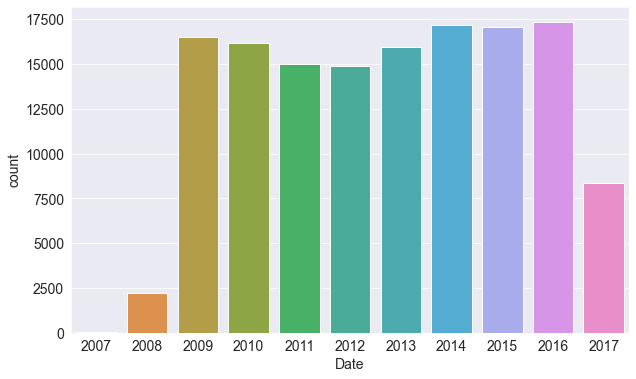

In [21]:
#alternative splittinf of the data based on time
plt.show('Number of Rows per Year')
sns.countplot(x=pd.to_datetime(weather_df.Date).dt.year)

In [22]:
year = pd.to_datetime(weather_df.Date).dt.year

train_df = weather_df[year < 2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year > 2015]

In [23]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [24]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        22.0   
144549       NaN          NE           31.0        ENE  ...        16.0   
144550       NaN         ESE           39.0        ESE  ...        15.0   
144551       NaN         ESE           43.0        ESE  ...        22.0   
144552       NaN         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8       NaN       NaN     23.7   
144549          8.0       1012.6       1007.6       NaN       NaN     28.9   
144550          8.0       1011.9       1008.0       NaN       NaN     29.7   
144551          9.0       1014.0       1009.2       NaN       NaN     29.8   
144552          9.0       1012.1       1006.2       NaN       NaN     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [25]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [26]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

In [27]:
#separating input columns from the target columns. The input (x values) takes all columns except the last column.
input_features = list(train_df.columns)[1:-1]
target_feature = 'RainTomorrow'

In [28]:
print(input_features)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [29]:
#separing the inputs and the targets from each sub-category of the data splits
train_input = train_df[input_features].copy()
train_target = train_df[target_feature].copy()

In [30]:
val_input = val_df[input_features].copy()
val_target = val_df[target_feature].copy()

In [31]:
test_input = test_df[input_features].copy()
test_target = test_df[target_feature].copy()

In [32]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [33]:
#separating numerical and categorical columns 
numerical_cols = train_input.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_input.select_dtypes('object').columns.tolist()

In [34]:
train_input[numerical_cols].describe().T

count         mean        std    min     25%     50%     75%  \
MinTemp        97674.0    12.007831   6.347175   -8.5     7.5    11.8    16.6   
MaxTemp        97801.0    23.022202   6.984397   -4.1    17.9    22.4    27.9   
Rainfall       97988.0     2.372935   8.518819    0.0     0.0     0.0     0.8   
Evaporation    61657.0     5.289991   3.952010    0.0     2.6     4.6     7.2   
Sunshine       57942.0     7.609004   3.788813    0.0     4.8     8.5    10.6   
WindGustSpeed  91160.0    40.215873  13.697967    6.0    31.0    39.0    48.0   
WindSpeed9am   97114.0    14.092263   8.984203    0.0     7.0    13.0    19.0   
WindSpeed3pm   96919.0    18.764608   8.872398    0.0    13.0    19.0    24.0   
Humidity9am    96936.0    68.628745  19.003097    0.0    57.0    70.0    83.0   
Humidity3pm    96872.0    51.469547  20.756113    0.0    37.0    52.0    66.0   
Pressure9am    88876.0  1017.513734   7.072510  980.5  1012.8  1017.5  1022.3   
Pressure3pm    88857.0  1015.132352   6.997072  979.0  1010.4  1015.1  1019.9   
Cloud9am       63000.0     4.302952   2.866634    0.0     1.0     5.0     7.0   
Cloud3pm       61966.0     4.410677   2.693370    0.0     2.0     5.0     7.0   
Temp9am        97414.0    16.835126   6.404586   -5.9    12.2    16.6    21.4   

                  max  
MinTemp          33.9  
MaxTemp          48.1  
Rainfall        371.0  
Evaporation      82.4  
Sunshine         14.3  
WindGustSpeed   135.0  
WindSpeed9am     87.0  
WindSpeed3pm     87.0  
Humidity9am     100.0  
Humidity3pm     100.0  
Pressure9am    1041.0  
Pressure3pm    1039.6  
Cloud9am          9.0  
Cloud3pm          9.0  
Temp9am          40.2

In [35]:
#check for unique values in each categorical column. This will be using during the encoding process. 
train_input[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [36]:
#define a data imputer that will 'deal' with missing numerical values. 
imputer = SimpleImputer(strategy='mean')

In [37]:
weather_df[numerical_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
dtype: int64

In [38]:
imputer.fit(weather_df[numerical_cols])

SimpleImputer()

In [39]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991]

In [40]:
#after fitting the imputer on the general dataset, the transform method is used to map the changes on the splits. 
train_input[numerical_cols] = imputer.transform(train_input[numerical_cols])
val_input[numerical_cols] = imputer.transform(val_input[numerical_cols])
test_input[numerical_cols] = imputer.transform(test_input[numerical_cols])

In [41]:
train_input[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

In [42]:
weather_df[numerical_cols].describe().T

count         mean        std    min     25%     50%  \
MinTemp        140319.0    12.184824   6.403879   -8.5     7.6    12.0   
MaxTemp        140480.0    23.235120   7.114500   -4.8    17.9    22.6   
Rainfall       140787.0     2.349974   8.465173    0.0     0.0     0.0   
Evaporation     81093.0     5.472516   4.189132    0.0     2.6     4.8   
Sunshine        73982.0     7.630540   3.781729    0.0     4.9     8.5   
WindGustSpeed  131682.0    39.970520  13.578201    6.0    31.0    39.0   
WindSpeed9am   139732.0    13.990496   8.886210    0.0     7.0    13.0   
WindSpeed3pm   138256.0    18.631141   8.798096    0.0    13.0    19.0   
Humidity9am    139270.0    68.826833  19.063650    0.0    57.0    70.0   
Humidity3pm    137286.0    51.449288  20.807310    0.0    37.0    52.0   
Pressure9am    127044.0  1017.654577   7.104867  980.5  1013.0  1017.6   
Pressure3pm    127018.0  1015.257963   7.035411  977.1  1010.4  1015.2   
Cloud9am        88162.0     4.431161   2.886594    0.0     1.0     5.0   
Cloud3pm        84693.0     4.499250   2.719752    0.0     2.0     5.0   
Temp9am        140131.0    16.987066   6.496012   -7.2    12.3    16.7   

                  75%     max  
MinTemp          16.8    33.9  
MaxTemp          28.3    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.7    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2

In [43]:
#scaling the data is also important as it helps increase the models efficiency as it learns the data. 
scaler = MinMaxScaler()

In [44]:
scaler.fit(weather_df[numerical_cols])

MinMaxScaler()

In [45]:
print('Minimums :')
list(scaler.data_min_)

Minimums :


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2]

In [46]:
print('Maximums :')
list(scaler.data_max_)

Maximums :


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2]

In [47]:
#similarly apply the scaler to the data splits to transform the scaled data values. 
train_input[numerical_cols] = scaler.transform(train_input[numerical_cols])
val_input[numerical_cols] = scaler.transform(val_input[numerical_cols])
test_input[numerical_cols] = scaler.transform(test_input[numerical_cols])

In [48]:
train_input[numerical_cols].describe().T

count      mean       std       min       25%       50%  \
MinTemp        97988.0  0.483689  0.149458  0.000000  0.377358  0.478774   
MaxTemp        97988.0  0.525947  0.131904  0.013233  0.429112  0.514178   
Rainfall       97988.0  0.006396  0.022962  0.000000  0.000000  0.000000   
Evaporation    97988.0  0.036949  0.021628  0.000000  0.026207  0.037741   
Sunshine       97988.0  0.525366  0.200931  0.000000  0.517241  0.526244   
WindGustSpeed  97988.0  0.265107  0.102420  0.000000  0.193798  0.255814   
WindSpeed9am   97988.0  0.108395  0.068800  0.000000  0.053846  0.100000   
WindSpeed3pm   97988.0  0.215668  0.101424  0.000000  0.149425  0.218391   
Humidity9am    97988.0  0.686309  0.189008  0.000000  0.570000  0.690000   
Humidity3pm    97988.0  0.514693  0.206376  0.000000  0.370000  0.520000   
Pressure9am    97988.0  0.612014  0.111335  0.000000  0.543802  0.614125   
Pressure3pm    97988.0  0.608705  0.106611  0.030400  0.540800  0.610527   
Cloud9am       97988.0  0.483192  0.255486  0.000000  0.333333  0.492351   
Cloud3pm       97988.0  0.493693  0.238028  0.000000  0.333333  0.499917   
Temp9am        97988.0  0.507089  0.134722  0.027426  0.409283  0.502110   

                    75%       max  
MinTemp        0.591981  1.000000  
MaxTemp        0.618147  1.000000  
Rainfall       0.002156  1.000000  
Evaporation    0.038621  0.568276  
Sunshine       0.634483  0.986207  
WindGustSpeed  0.310078  1.000000  
WindSpeed9am   0.146154  0.669231  
WindSpeed3pm   0.275862  1.000000  
Humidity9am    0.830000  1.000000  
Humidity3pm    0.650000  1.000000  
Pressure9am    0.682645  1.000000  
Pressure3pm    0.675200  1.000000  
Cloud9am       0.666667  1.000000  
Cloud3pm       0.666667  1.000000  
Temp9am        0.601266  1.000000

In [49]:
weather_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [50]:
#To better handle categorical values in the dataset, an Encoder will be important to help parse categorical values to the model. 
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [51]:
encoder.fit(weather_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [52]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [53]:
encoded_columns = list(encoder.get_feature_names(categorical_cols))

In [54]:
encoder.fit(train_input[categorical_cols])
encoder.fit(val_input[categorical_cols])
encoder.fit(test_input[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [55]:
#after fitting the encoder on the general dataset, we parse it here to transform the data splits. 
train_input[encoded_columns] = encoder.transform(train_input[categorical_cols])
val_input[encoded_columns] = encoder.transform(val_input[categorical_cols])
test_input[encoded_columns] = encoder.transform(test_input[categorical_cols])

In [56]:
test_input

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
2498           ENE       0.372093        NaN        ESE  ...            0.0   
2499           SSE       0.341085        SSE         SE  ...            1.0   
2500           ENE       0.325581        ESE        ENE  ...            0.0   
2501           SSE       0.255814         SE        SSE  ...            0.0   
2502           ENE       0.193798         SE        SSE  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
145454           E       0.193798        ESE          E  ...            0.0   
145455           E       0.193798         SE        ENE  ...            0.0   
145456         NNW       0.124031         SE          N  ...            0.0   
145457           N       0.240310         SE        WNW  ...            0.0   
145458          SE       0.170543        SSE          N  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
2498               0.0             0.0            0.0           0.0   
2499               0.0             0.0            0.0           0.0   
2500               0.0             0.0            0.0           0.0   
2501               1.0             0.0            0.0           0.0   
2502               1.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
145454             0.0             0.0            0.0           0.0   
145455             0.0             0.0            0.0           0.0   
145456             0.0             0.0            0.0           0.0   
145457             0.0             0.0            0.0           0.0   
145458             0.0             0.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
2498               0.0             0.0             0.0           1.0   
2499               0.0             0.0             0.0           1.0   
2500               0.0             0.0             0.0           0.0   
2501               0.0             0.0             0.0           0.0   
2502               0.0             0.0             0.0           0.0   
...                ...             ...             ...           ...   
145454             0.0             0.0             0.0           1.0   
145455             0.0             0.0             0.0           1.0   
145456             0.0             0.0             0.0           1.0   
145457             1.0             0.0             0.0           1.0   
145458             0.0             0.0             0.0           1.0   

        RainToday_Yes  
2498              0.0  
2499              0.0  
2500              1.0  
2501              1.0  
2502              1.0  
...               ...  
145454            0.0  
145455            0.0  
145456            0.0  
145457            0.0  
145458            0.0  

[25710 rows x 123 columns]

In [57]:
print('train_inputs:', train_input.shape)
print('train_targets:', train_target.shape)
print('val_inputs:', val_input.shape)
print('val_targets:', val_target.shape)
print('test_inputs', test_input.shape)
print('test_targets:', test_target.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs (25710, 123)
test_targets: (25710,)


In [58]:
#We save the now prepared data into parquets for use 'later on'
train_input.to_parquet('train_inputs.parquet')
val_input.to_parquet('val_inputs.parquet')
test_input.to_parquet('test_inputs.parquet')

In [59]:
%%time
pd.DataFrame(train_target).to_parquet('train_targets.parquet')
pd.DataFrame(val_target).to_parquet('val_targets.parquet')
pd.DataFrame(test_target).to_parquet('test_targets.parquet')

Wall time: 388 ms


In [114]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_feature]
val_targets = pd.read_parquet('val_targets.parquet')[target_feature]
test_targets = pd.read_parquet('test_targets.parquet')[target_feature]

In [62]:
print('train_inputs:', train_input.shape)
print('train_targets:', train_target.shape)
print('val_inputs:', val_input.shape)
print('val_targets:', val_target.shape)
print('test_inputs', test_input.shape)
print('test_targets:', test_target.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs (25710, 123)
test_targets: (25710,)


In [64]:
#create a Logistic regression model and parse onto it parameters for 'learning'
log_model = LogisticRegression(solver='liblinear')

In [65]:
log_model.fit(train_input[numerical_cols + encoded_columns], train_target)

LogisticRegression(solver='liblinear')

In [66]:
print(numerical_cols + encoded_columns)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums'

In [67]:
print(log_model.coef_.tolist())

[[0.9828793713902126, -1.6137604530933534, 3.2568411835157502, 0.7393932830298541, -1.6657304268313133, 6.712771813916815, -0.8946188587498674, -1.4786364992410834, 0.5086122262109282, 5.668982150907667, 5.751323867194876, -9.442311270566545, -0.15422822088354826, 1.2692616710310392, 0.9610508425772404, 0.5968141277489685, -0.543355730504022, 0.4841001872107527, 0.012663220931428458, 0.34209526568141635, -0.35029196772750537, 0.18145012817507722, 0.4258555918681547, -0.0049070342306280715, 0.01542726368764527, 0.2537881476673292, -0.01839030913911003, -0.030477000555234942, -0.4672875013498848, -0.14419060041125878, -0.5908181620788256, -0.7446018292673806, -0.24988532022187526, -0.32867692031659823, -0.570928649942344, 0.08018257710787349, 0.014037715021923598, 0.05995134946037382, -0.8771312274700959, -0.4414731208734736, 0.011821828322149269, -0.4594828958088217, -0.46018054736329084, -0.07469506863392604, 0.19457490683266465, 0.44567646912439773, 0.6073713692364762, 0.4303978835050

In [68]:
print(log_model.intercept_)

[-2.36394984]


In [69]:
X_train = train_input[numerical_cols + encoded_columns]
X_val = val_input[numerical_cols + encoded_columns]
X_test = test_input[numerical_cols + encoded_columns]

In [70]:
#use the trained model to predict values in the training set
train_preds = log_model.predict(X_train)

In [71]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [72]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [73]:
train_probability = log_model.predict_proba(X_train)
train_probability

array([[0.93950679, 0.06049321],
       [0.94333107, 0.05666893],
       [0.9598042 , 0.0401958 ],
       ...,
       [0.98730049, 0.01269951],
       [0.98358062, 0.01641938],
       [0.87599379, 0.12400621]])

In [74]:
log_model.classes_

array(['No', 'Yes'], dtype=object)

In [76]:
accuracy_score(train_target, train_preds)

0.8519002326815528

In [78]:
confusion_matrix(train_target, train_preds, normalize='true')

array([[0.94613466, 0.05386534],
       [0.477475  , 0.522525  ]])

In [81]:
def predict_plot(inputs, targets, name=''):
    preds = log_model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

    confusion = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(confusion, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

Accuracy: 85.19%


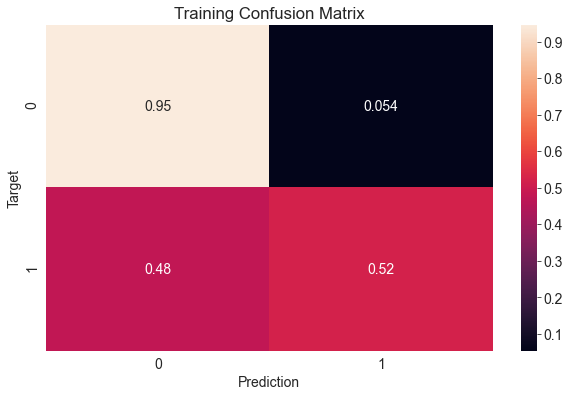

In [82]:
train_preds = predict_plot(X_train, train_target, 'Training')

Accuracy: 85.41%


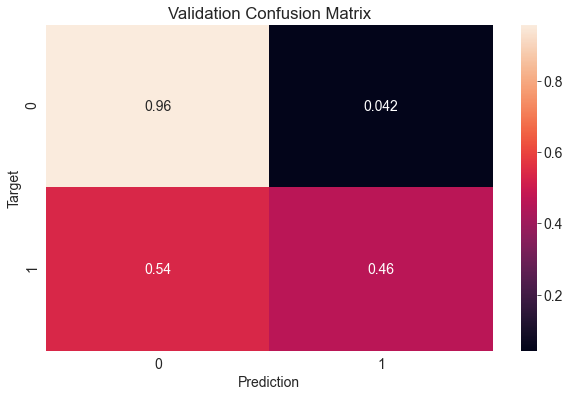

In [83]:
val_preds = predict_plot(X_val, val_target, 'Validation')

Accuracy: 84.25%


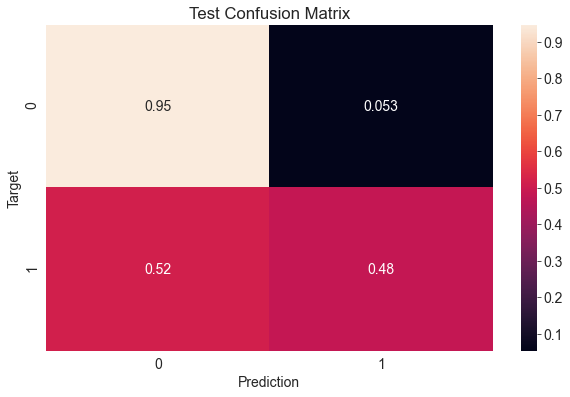

In [84]:
test_preds = predict_plot(X_test, test_target, 'Test')

In [85]:
#To ascertain the validity of our model's good accuracy, we create two baseline model to see how they perform alongside our model. 
#Baseline Models to test the 'sanity' level of our model. 
def random_guess(inputs):
    return np.random.choice(['No', 'Yes'], len(inputs))

In [86]:
def all_no(inputs):
    return np.full(len(inputs), 'No')

In [87]:
accuracy_score(test_target, random_guess(X_test))

0.49681057954103464

In [88]:
#Both the random guess and all_no models yield a lower accuracy than our trained model. This justifies the good accuracy of our model. 
accuracy_score(test_target, all_no(X_test))

0.7734344612991054

In [89]:
#using the trained model to predict a single input
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [92]:
new_input_df = pd.DataFrame([new_input])

In [93]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         NNW           52.0         NW  ...         20.0         89.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         58.0       1004.8       1001.5       8.0       5.0     25.7   

   Temp3pm  RainToday  
0     33.0        Yes  

[1 rows x 22 columns]

In [95]:
#Just as in the general dataset, prepare the dta using the imputer, scaler and label encoder. 
new_input_df[numerical_cols] = imputer.transform(new_input_df[numerical_cols])
new_input_df[numerical_cols] = scaler.transform(new_input_df[numerical_cols])
new_input_df[encoded_columns] = encoder.transform(new_input_df[categorical_cols])

In [96]:
X_new_input = new_input_df[numerical_cols + encoded_columns]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.218105  0.104316  0.000074       0.0002  0.036293      -0.043747   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SE  \
0      0.000769      0.002642       0.0089       0.0058  ...            0.0   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0             0.0           0.0            1.0  

[1 rows x 117 columns]

In [97]:
prediction = log_model.predict(X_new_input)[0]

In [98]:
prediction

'Yes'

In [99]:
probability_new = log_model.predict_proba(X_new_input)[0]

In [100]:
#The model predicts a sure value that it will not rain tomorrow in Katherine
probability_new

array([0., 1.])

In [115]:
#to effectively predict single inputs for different we write a function that we can pass single inputs to and get the prediction and the probability of rain tomorrow. 
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    
    input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    input_df[encoded_columns] = encoder.transform(input_df[categorical_cols])

    X_input = input_df[numerical_cols + encoded_columns]

    pred_value = log_model.predict(X_input)[0]
    probability = log_model.predict_proba(X_input)[0][list(log_model.classes_).index(pred_value)]

    return pred_value, probability

In [116]:
new_input_1 = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [117]:
predict_input(new_input_1)

('Yes', 0.6316590051585192)

In [110]:
#for reusability, we save the model using joblib. 
aussie_rain = {
    'model': log_model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_features,
    'target_col': target_feature,
    'numeric_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_columns
}

In [111]:
joblib.dump(aussie_rain, 'australian_rain_prediction.joblib')

['australian_rain_prediction.joblib']

In [112]:
rain_australia = joblib.load('australian_rain_prediction.joblib')

In [113]:
test_preds_2 = rain_australia['model'].predict(X_test)
accuracy_score(test_target, test_preds_2)

0.8424737456242707